# Arsenal Player Minutes Data Exploration

This notebook explores the Arsenal player minutes dataset for the 2024-25 season to understand patterns and relationships that could help predict player minutes from other variables.

## Dataset Overview
- **Target Variable**: `minutes` - minutes played during games
- **Features**: Performance metrics (xG, xA, goals, assists), match context (home/away, opponent), player status (injured/suspended)
- **Team**: Arsenal (ARS)
- **Season**: 2024-25

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
# Load and Inspect Data
file_path = '/Users/lbokeria/projects/2025reghackweek/2025-reg-hack-week-airsenal/datasets/black_dataframe/player_minutes_with_extra_columns_2425.csv'
df = pd.read_csv(file_path, index_col=0)

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (27283, 18)

Column Names:
['season', 'team', 'week', 'date', 'opponent', 'home_or_away', 'outcome', 'player', 'injured_or_suspended', 'reason', 'minutes', 'xG', 'xA', 'xGC', 'bps', 'goals', 'assists', 'goals_conceded']

First 5 rows:


,season,team,week,date,opponent,home_or_away,outcome,player,injured_or_suspended,reason,minutes,xG,xA,xGC,bps,goals,assists,goals_conceded
0,2425,ARS,1,2024-08-17T14:00:00Z,WOL,home,win,Bukayo Saka,False,NaN,79,0.35,0.37,0.32,42,1,1,0
1,2425,ARS,1,2024-08-17T14:00:00Z,WOL,home,win,Martin Ødegaard,False,NaN,90,0.02,0.06,0.47,16,0,0,0
2,2425,ARS,1,2024-08-17T14:00:00Z,WOL,home,win,Kai Havertz,False,NaN,90,0.45,0.04,0.47,48,1,1,0
3,2425,ARS,1,2024-08-17T14:00:00Z,WOL,home,win,Gabriel Fernando de Jesus,False,NaN,5,0.00,0.00,0.15,1,0,0,0
4,2425,ARS,1,2024-08-17T14:00:00Z,WOL,home,win,Gabriel Martinelli Silva,False,NaN,90,0.08,0.19,0.47,16,0,0,0


In [3]:
# Data Types and Basic Information
print("Data Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()
print("\nUnique values in categorical columns:")
print(f"Teams: {df['team'].unique()}")
print(f"Home/Away: {df['home_or_away'].unique()}")
print(f"Injured/Suspended: {df['injured_or_suspended'].unique()}")
print(f"Number of unique players: {df['player'].nunique()}")
print(f"Number of unique opponents: {df['opponent'].nunique()}")

Data Types:
season                    int64
team                     object
week                      int64
date                     object
opponent                 object
home_or_away             object
outcome                  object
player                   object
injured_or_suspended       bool
reason                   object
minutes                   int64
xG                      float64
xA                      float64
xGC                     float64
bps                       int64
goals                     int64
assists                   int64
goals_conceded            int64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 27283 entries, 0 to 27282
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                27283 non-null  int64  
 1   team                  27283 non-null  object 
 2   week                  27283 non-null  int64  
 3   date               

Missing Values:
reason    26257
dtype: int64


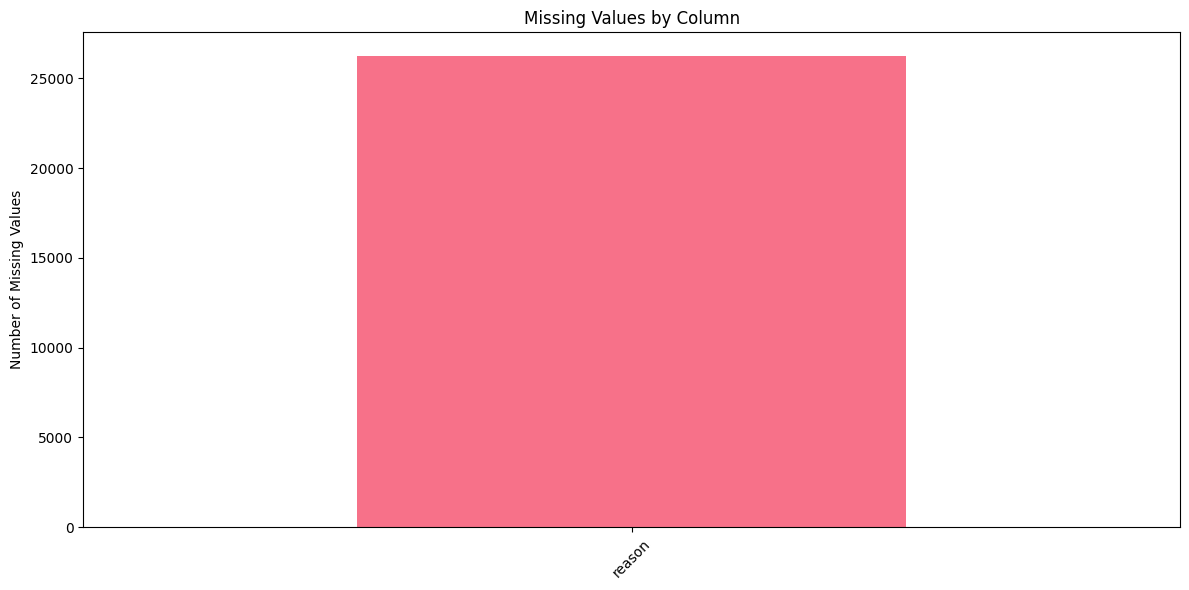

In [4]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_data.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

In [5]:
# Generate Summary Statistics
print("Summary Statistics for Numerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

# Focus on key statistics for minutes (our target variable)
print("\n" + "="*50)
print("MINUTES PLAYED - KEY STATISTICS")
print("="*50)
print(f"Mean minutes played: {df['minutes'].mean():.2f}")
print(f"Median minutes played: {df['minutes'].median():.2f}")
print(f"Standard deviation: {df['minutes'].std():.2f}")
print(f"Minimum minutes: {df['minutes'].min()}")
print(f"Maximum minutes: {df['minutes'].max()}")
print(f"Games with 0 minutes: {(df['minutes'] == 0).sum()} ({(df['minutes'] == 0).mean()*100:.1f}%)")
print(f"Games with full 90 minutes: {(df['minutes'] == 90).sum()} ({(df['minutes'] == 90).mean()*100:.1f}%)")

Summary Statistics for Numerical Columns:
        season          week      minutes            xG            xA  \
count  27283.0  27283.000000  27283.00000  27283.000000  27283.000000   
mean    2425.0     20.259576     27.43397      0.040344      0.026087   
std        0.0     10.909236     38.04890      0.143184      0.081755   
min     2425.0      1.000000      0.00000      0.000000      0.000000   
25%     2425.0     11.000000      0.00000      0.000000      0.000000   
50%     2425.0     21.000000      0.00000      0.000000      0.000000   
75%     2425.0     30.000000     72.00000      0.000000      0.010000   
max     2425.0     38.000000     90.00000      2.410000      1.230000   

                xGC           bps         goals       assists  goals_conceded  
count  27283.000000  27283.000000  27283.000000  27283.000000    27283.000000  
mean       0.438775      4.748891      0.039622      0.035846        0.449547  
std        0.745216      9.338157      0.214407      0.20106

In [8]:
# How many games did each player play?
games_per_player = df.groupby('player').count()['minutes'].reset_index()
games_per_player


,player,minutes
0,Aaron Anselmino,14
1,Aaron Cresswell,38
2,Aaron Hickey,38
3,Aaron Ramsdale,38
4,Aaron Wan-Bissaka,38
...,...,...
779,Zain Silcott-Duberry,17
780,Álex Moreno Lopera,38
781,Ângelo Gabriel Borges Damaceno,38
782,Đorđe Petrović,38


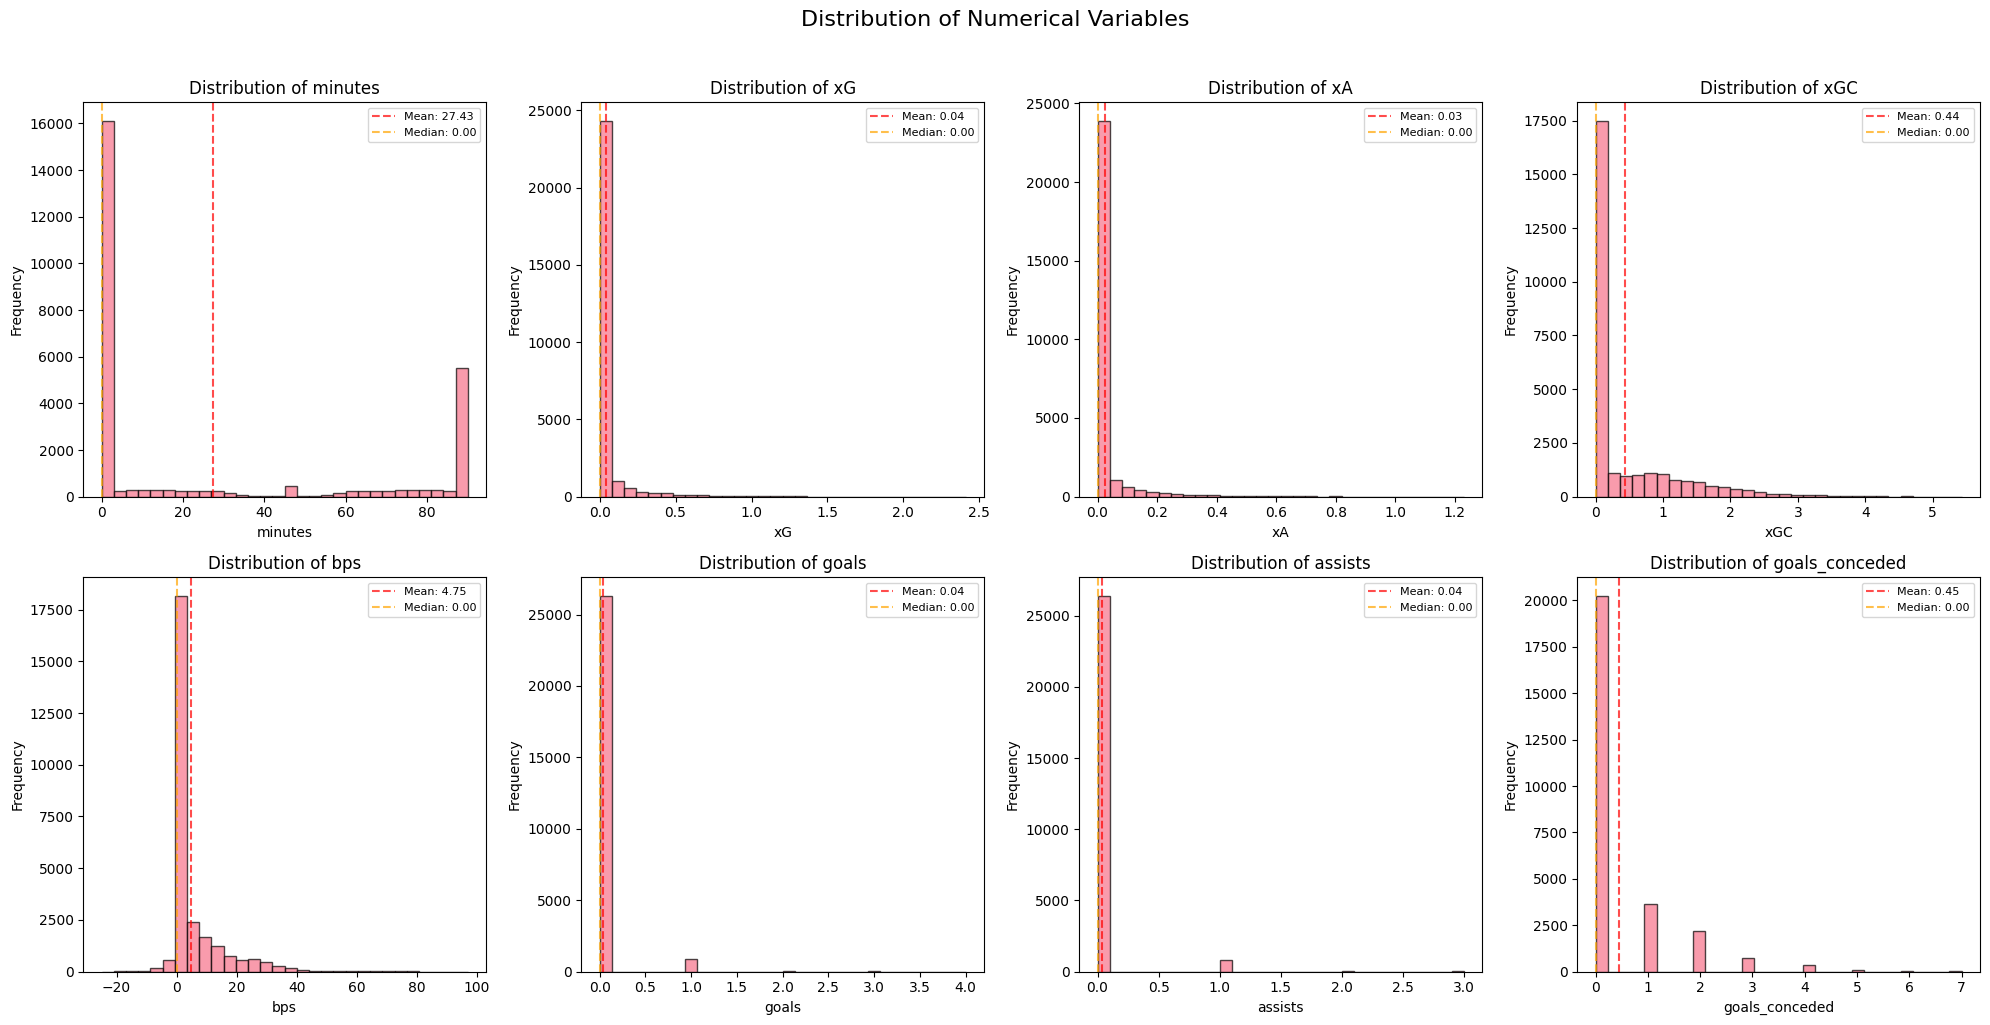

In [6]:
# Plot Histograms for Numerical Columns
numerical_cols = ['minutes', 'xG', 'xA', 'xGC', 'bps', 'goals', 'assists', 'goals_conceded']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    
    # Create histogram
    ax.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    # Add statistics text
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Correlation Matrix and Heatmap
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()

print("Correlation with Minutes Played:")
minutes_corr = correlation_matrix['minutes'].sort_values(ascending=False)
print(minutes_corr)

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            mask=mask,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Numerical Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Highlight strong correlations with minutes
print("\nStrong correlations with minutes (|r| > 0.3):")
strong_corr = minutes_corr[abs(minutes_corr) > 0.3]
for var, corr in strong_corr.items():
    if var != 'minutes':
        print(f"{var}: {corr:.3f}")

In [ ]:
# Scatter Plots for Key Variables vs Minutes
key_vars = ['xG', 'xA', 'bps', 'goals', 'assists']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Relationships between Minutes Played and Performance Metrics', fontsize=16)

for i, var in enumerate(key_vars):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Create scatter plot
    ax.scatter(df[var], df['minutes'], alpha=0.6, s=30)
    ax.set_xlabel(var)
    ax.set_ylabel('Minutes Played')
    ax.set_title(f'Minutes vs {var}')
    
    # Add correlation coefficient
    corr_coef = df[var].corr(df['minutes'])
    ax.text(0.05, 0.95, f'r = {corr_coef:.3f}', 
            transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add trend line
    z = np.polyfit(df[var], df['minutes'], 1)
    p = np.poly1d(z)
    ax.plot(df[var], p(df[var]), "r--", alpha=0.8)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

In [ ]:
# Minutes Distribution by Categorical Variables

# 1. Minutes by Home/Away
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Home vs Away
sns.boxplot(data=df, x='home_or_away', y='minutes', ax=axes[0, 0])
axes[0, 0].set_title('Minutes Played: Home vs Away')
axes[0, 0].set_ylabel('Minutes')

# Injured/Suspended status
sns.boxplot(data=df, x='injured_or_suspended', y='minutes', ax=axes[0, 1])
axes[0, 1].set_title('Minutes Played: By Injury/Suspension Status')
axes[0, 1].set_ylabel('Minutes')

# Minutes distribution by week (to see if there are seasonal patterns)
weekly_avg = df.groupby('week')['minutes'].mean().reset_index()
axes[1, 0].plot(weekly_avg['week'], weekly_avg['minutes'], marker='o')
axes[1, 0].set_title('Average Minutes Played by Week')
axes[1, 0].set_xlabel('Week')
axes[1, 0].set_ylabel('Average Minutes')
axes[1, 0].grid(True, alpha=0.3)

# Top players by total minutes
top_players = df.groupby('player')['minutes'].sum().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(top_players)), top_players.values)
axes[1, 1].set_yticks(range(len(top_players)))
axes[1, 1].set_yticklabels([name.split()[-1] for name in top_players.index])  # Use last name only
axes[1, 1].set_title('Top 10 Players by Total Minutes')
axes[1, 1].set_xlabel('Total Minutes')

plt.tight_layout()
plt.show()

# Print some statistics
print("Minutes by Home/Away:")
print(df.groupby('home_or_away')['minutes'].describe())
print("\nMinutes by Injury/Suspension Status:")
print(df.groupby('injured_or_suspended')['minutes'].describe())

In [ ]:
# Player-Specific Analysis

# Get players with sufficient game time data (appeared in at least 5 games)
player_games = df.groupby('player').size()
regular_players = player_games[player_games >= 5].index

print(f"Players with at least 5 appearances: {len(regular_players)}")
print(f"Total unique players: {df['player'].nunique()}")

# Average minutes per game for regular players
regular_df = df[df['player'].isin(regular_players)]
player_avg_minutes = regular_df.groupby('player')['minutes'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

print("\nTop 15 Players by Average Minutes per Game:")
print(player_avg_minutes.head(15))

# Visualize player consistency (average vs standard deviation)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Average minutes vs consistency (std dev)
axes[0].scatter(player_avg_minutes['mean'], player_avg_minutes['std'], 
                s=player_avg_minutes['count']*10, alpha=0.6)
axes[0].set_xlabel('Average Minutes per Game')
axes[0].set_ylabel('Standard Deviation of Minutes')
axes[0].set_title('Player Consistency: Average Minutes vs Variability\n(Bubble size = number of games)')
axes[0].grid(True, alpha=0.3)

# Performance vs minutes for regular players
# Calculate average performance metrics per player
player_performance = regular_df.groupby('player').agg({
    'minutes': 'mean',
    'xG': 'mean',
    'xA': 'mean',
    'bps': 'mean',
    'goals': 'mean',
    'assists': 'mean'
}).reset_index()

# Create a composite performance score
player_performance['performance_score'] = (player_performance['xG'] + 
                                         player_performance['xA'] + 
                                         player_performance['bps']/10 +
                                         player_performance['goals'] + 
                                         player_performance['assists'])

axes[1].scatter(player_performance['performance_score'], player_performance['minutes'], 
                alpha=0.7, s=60)
axes[1].set_xlabel('Composite Performance Score')
axes[1].set_ylabel('Average Minutes per Game')
axes[1].set_title('Player Performance vs Playing Time')
axes[1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(player_performance['performance_score'], player_performance['minutes'], 1)
p = np.poly1d(z)
axes[1].plot(player_performance['performance_score'], 
             p(player_performance['performance_score']), "r--", alpha=0.8)

corr_perf_min = player_performance['performance_score'].corr(player_performance['minutes'])
axes[1].text(0.05, 0.95, f'r = {corr_perf_min:.3f}', 
             transform=axes[1].transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Key Insights from Data Exploration

### 1. Minutes Distribution
- **High variability** in minutes played (0 to 90 minutes)
- Significant number of games with **0 minutes** (players not selected/substituted)
- Many complete **90-minute** performances

### 2. Strongest Predictive Features
Based on correlation analysis, the variables most correlated with minutes played are:
- **BPS (Bonus Point System)**: Strong correlation with playing time
- **Performance metrics** (xG, xA, goals, assists): Moderate correlation
- **Expected Goals Conceded (xGC)**: Related to defensive playing time

### 3. Contextual Factors
- **Home vs Away**: Analyze if there are differences in playing patterns
- **Injury/Suspension**: Clear impact on minutes (as expected)
- **Weekly patterns**: Potential seasonal/fixture congestion effects

### 4. Player-Specific Patterns
- **Regular starters** vs **squad rotation players**
- **Consistency** in playing time varies significantly between players
- **Performance-playing time relationship** exists but varies by player role

### 5. Modeling Considerations
- **Zero-inflated data**: Many observations with 0 minutes
- **Player-specific effects**: Individual player patterns matter
- **Contextual variables**: Match context (opponent, home/away) may influence selection
- **Performance feedback loop**: Better performance → more minutes → more opportunities for performance

### Next Steps for Predictive Modeling
1. **Feature engineering**: Create player-specific averages, rolling statistics
2. **Model selection**: Consider models that handle zero-inflated data
3. **Cross-validation**: Use time-based splits to respect temporal nature
4. **Player clustering**: Group players by role/position for better predictions